In [164]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('data/ex2data1.txt', unpack=True, dtype='float32', delimiter=',')
xdata = data.T[:, 0:2]
m = len(xdata)
xdata = np.concatenate((np.ones((m, 1)), xdata), axis=1)
ydata = data.T[:, 2:]
#ydata = np.reshape(ydata, (m, 1))
print(xdata)
print(ydata.shape)

[[  1.          34.62366104  78.02469635]
 [  1.          30.28671074  43.89499664]
 [  1.          35.84740829  72.90219879]
 [  1.          60.18259811  86.3085556 ]
 [  1.          79.03273773  75.34437561]
 [  1.          45.08327866  56.31637192]
 [  1.          61.10666275  96.51142883]
 [  1.          75.02474213  46.5540123 ]
 [  1.          76.0987854   87.42057037]
 [  1.          84.43282318  43.53339386]
 [  1.          95.86155701  38.22527695]
 [  1.          75.01365662  30.60326385]
 [  1.          82.30705261  76.48196411]
 [  1.          69.36458588  97.71868896]
 [  1.          39.53833771  76.03681183]
 [  1.          53.97105026  89.20735168]
 [  1.          69.07014465  52.74047089]
 [  1.          67.94685364  46.67857361]
 [  1.          70.66150665  92.92713928]
 [  1.          76.97878265  47.57596207]
 [  1.          67.37202454  42.83843994]
 [  1.          89.67677307  65.79936218]
 [  1.          50.53479004  48.85581207]
 [  1.          34.21206284  44.20

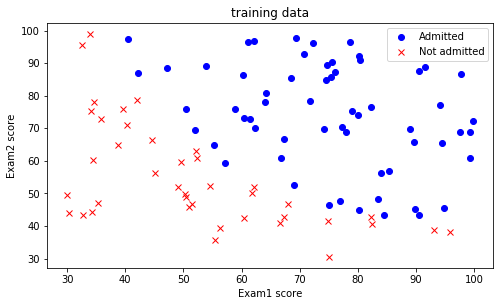

In [165]:
passed = data.T[:, 2] == 1 
failed = data.T[:, 2] == 0
plt.plot(data.T[passed, 0], data.T[passed, 1], 'bo', label='Admitted')
plt.plot(data.T[failed, 0], data.T[failed, 1], 'rx', label='Not admitted')
plt.rcParams["figure.figsize"] = [10,5]
plt.title('training data')
plt.xlabel('Exam1 score')
plt.ylabel('Exam2 score')
plt.legend()
plt.show()

In [180]:
theta = tf.Variable(tf.zeros([xdata.shape[1],1]))
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

hypothesis = tf.nn.sigmoid(tf.matmul(X, theta))
cost_function = tf.reduce_mean(-Y * tf.log(tf.clip_by_value(hypothesis, 1e-9, 1)) -(1-Y) * tf.log(tf.clip_by_value(1-hypothesis, 1e-9, 1)))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.0008)
updates = optimizer.minimize(cost_function)

In [181]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(150001):
        sess.run(updates, feed_dict={X:xdata, Y:ydata})
        if i % 10000 == 0:
            print (sess.run(cost_function, feed_dict={X:xdata, Y:ydata}))
    
    theta_value_tensor = sess.run(theta, feed_dict={X:xdata, Y:ydata})
    print(theta_value_tensor)

0.659196
0.593376
0.56162
0.533898
0.509626
0.488295
0.469465
0.452767
0.437889
0.424571
0.412596
0.401778
0.39196
0.383025
0.374848
0.367355
[[-5.44443369]
 [ 0.05007439]
 [ 0.04317024]]


[  30.   40.   50.   60.   70.   80.   90.  100.]


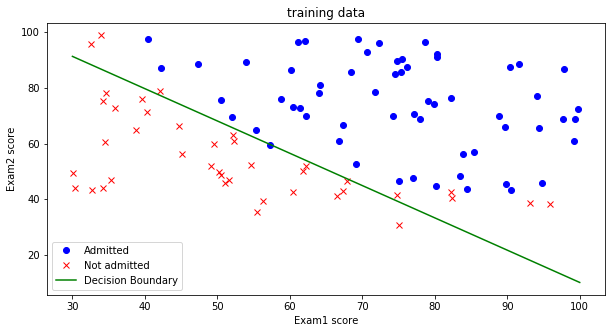

In [182]:
alpha = -1 * theta_value_tensor[1,0] / theta_value_tensor[2,0]
beta = -1 * theta_value_tensor[0,0] / theta_value_tensor[2,0]
plotx = np.linspace(30, 100, 8)
print(plotx)

passed = data.T[:, 2] == 1 
failed = data.T[:, 2] == 0
plt.plot(data.T[passed, 0], data.T[passed, 1], 'bo', label='Admitted')
plt.plot(data.T[failed, 0], data.T[failed, 1], 'rx', label='Not admitted')
plt.plot(plotx, plotx*alpha+beta, 'g', label='Decision Boundary')

plt.rcParams["figure.figsize"] = [10,5]
plt.title('training data')
plt.xlabel('Exam1 score')
plt.ylabel('Exam2 score')
plt.legend()
plt.show()